In [2]:
import pandas as pd
import numpy as np

trn = pd.read_csv('input/train_ver2.csv')

C:\Users\User\anaconda3\envs\kaggle_venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 기초 통계

### 기초 통계로 데이터 살펴보기

데이터의 크기 / 첫 5줄 확인

- 총 13,647,309개의 고객 데이터
- 고객마다 48개의 변수가 존재

In [6]:
# trn.shape
trn.head()

NameError: name 'trn' is not defined

모든 변수에 대하여 미리 보기

In [8]:
for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

**주의할 점**

- fecha_dato : 날짜 전용 데이터 타입인 datetime이 아닌 object이다.
- age        : 역시 데이터 타입이 object로 전처리 과정에서 int 타입으로 변환이 필요하다.
- renta      : 가구 총 수입을 나타냄. 5번째 열에서 NaN이 보임. 전처리 과정에서 이와 같은 결측값에 대한 변환도 필요하다.

### TIP 탐색적 데이터 분석을 통해 우리가 얻고자 하는 것?

> 새로 접하는 데이터에 대한 첫 분석 과정에서 데이터의 모든 것을 이해하려고 할 필요 없음!
랜덤하게 일부 행을 눈으로 살펴보며 단계적으로 데이터에 익숙해지려고 해보자
데이터에 대한 간단한 시각화도 큰 도움이 된다!
>
> - 아, 이번 경진대회 데이터는 이렇게 생겼구나
> - 이러한 변수들이 존재하는구나
> - data type을 보니, 이 변수는 전처리를 수행해야겠다
>
>정도의 느낌을 가져보자

In [9]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

### 데이터 크기

앞서 .shape 함수를 통해 확인 했었다.

.info() 결과의 2, 3번째 줄 (RangeIndex, Data columns) 값으로 총 고객 데이터 수와 변수의 개수를 알 수 있다

### 변수

이어지는 48줄은 변수명과 해당 변수의 데이터 타입을 보여준다.

변수명이 스페인어로 구성되어 있는 것을 확인할 수 있다.

총 24개의 고객 관련 변수, 24개의 금융 제품 변수로 구성되어 있다.

### 데이터 타입

8개의 64bit float, 23개의 64bit int, 17개의 object 타입이 있다. 

머신러닝 모델 학습을 위해서는 훈련 데이터의 데이터 타입이 모두 int 혹은 float이어야 한다!

그러므로 전처리 과정에서 object 타입과 같은 변수를 적절하게 변환해서 모델 학습을 진행해야 한다.

### 메모리

.info() 를 통해 훈련 데이터의 메모리량도 확인 가능하다.

train_ver2.csv 파일은 2.2GB의 용량이지만, pandas를 통해 읽어오면 총 4.9GB의 메모리를 사용하게 된다.

불필요한 변수명 제거, 데이터 타입 변경 등을 통해 메모리를 효율적으로 사용할 수 있다.

---

### 수치형 / 범주형 변수

24개의 고객 관련 변수에 대해서 자세히 살펴보자.


#### 수치형

수치형 (int64, float64) 타입을 갖는 고객 변수를 "num_cols"로 추출하고 .describe()를 통해 간단한 요약 통계를 확인한다.

In [3]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]

trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


24개 변수 중, 7개가 수치형 변수임을 확인 할 수 있다.

**.describe()** 함수는 pandas 데이터 프레임의 기초 통계를 보여준다.

min, max 값 사이의 precentile 값을 확인하는 것만으로도 해당 변수에 대한 이해를 높일 수 있다.

|번호|변수 이름|설명|비고|
|---|:---|:---|:---|
|1|nocodpers|고객 고유 식별 번호|(min) 15,889 ~ (max) 1,553,689 |
|2|ind_nuevo|신규 고객 지표|75%의 값이 0, 나머지(15%)가 값이 1|
|3|inderel|고객 등급 변수|75%의 값이 0, 나머지(15%)가 값이 99|
|4|tipodom|주소 유형 변수|모든 값이 1 (모든 값이 상수일 경우 변수로서 식별력을 가질 수 없음. 즉, 학습에 도움이 되지 않는 변수)|
|5|cod_prov|지방 코드 변수|(min) 1 ~ (max) 52의 값을 가지며, 수치형이지만 범주형 변수로서 의미를 가짐|
|6|ind_actividad_cliente|활발성 지표|50% 값이 0, 나머지(50%)가 값 1|
|7|renta|가구 총 수입|(min) 1,202.73 ~ (max) 28,894,400의 값|

#### 범주형

이번에는 (object) 데이터 타입을 갖는 범주형 변수를 "cat_cols"로 추출하고 간단한 요약 통계를 확인한다.

In [9]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]

trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


24개 변수 중, 17개가 범주형 변수이다.

수치형 변수에 대한 결과값과 조금 다른 것을 볼 수 있다. 각 행은 다음과 같은 의미가 있다.

|번호|결과행|설명|비고|
|-----|:---|:------|:---|
|1| count | 해당 변수의 유요한 데이터 개수 의미 | 'ult_fec_cil_1t'의 count가 24,793 밖에 확인되지 않으므로 결측값이 대부분임을 확인|
|2| unique | 해당 범주형 변수의 고유값 개수를 의미 | 성별 변수인 'sexo'에는 고유값이 2개임을 확인 |
|3| top | 가장 빈도가 높은 데이터 표시 | 나이 변수 'age'에서 최빈 데이터는 23세임을 확인 |
|4| freq | 최빈 데이터의 빈도수를 의미 | 총 데이터 수(count) 대비 최빈값(top)이 어느 정도인지에 따라 분포를 가늠할 수 있음.'ind_empleado'의 5개 고유값 중 가장 빈도가 높은 'N' 데이터가 전체의 99.9% 가량을 차지하며 데이터가 매우 편중되어 있음을 확인|

**주의해야할 점**

나이를 의미하는 'age', 은행 누적 거래 기간을 나타내는 'antiguedad'가 변수가 수치형이 아닌 범주형으로 분류되어 있다.

전처리 과정에서 수치형으로 변환해야 한다.

.
.

범주형 변수의 고유값을 직접 눈으로 확인해보자.

In [12]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print(f'# col {col}, n_uniq {len(uniq)}, uniq{uniq}')

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KCJ' 'KC

## 시각화

### 막대 그래프로 데이터 살펴보기

데이터 시각화를 위하여 **matplotlib** 와 **seaborn** 라이브러리 사용

Jupyter Notebook에서 시각화하려면 그래프를 Notebook 내부에 출력하도록 다음과 같이 설정해야 한다.

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#jupyter notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline

각 변수에 대하여 막대 그래프(Histogram)를 그려본다.

고객 고유 식별 번호인 'ncodpers'와 총 수입을 나타내는 'renta' 두 변수는 고유값이 너무 많아 시각화에 시간이 너무 많이 소요되므로, 이번 시각화에서는 건너뛰도록 설정한다.

--------------------------------------------------
col :  fecha_dato


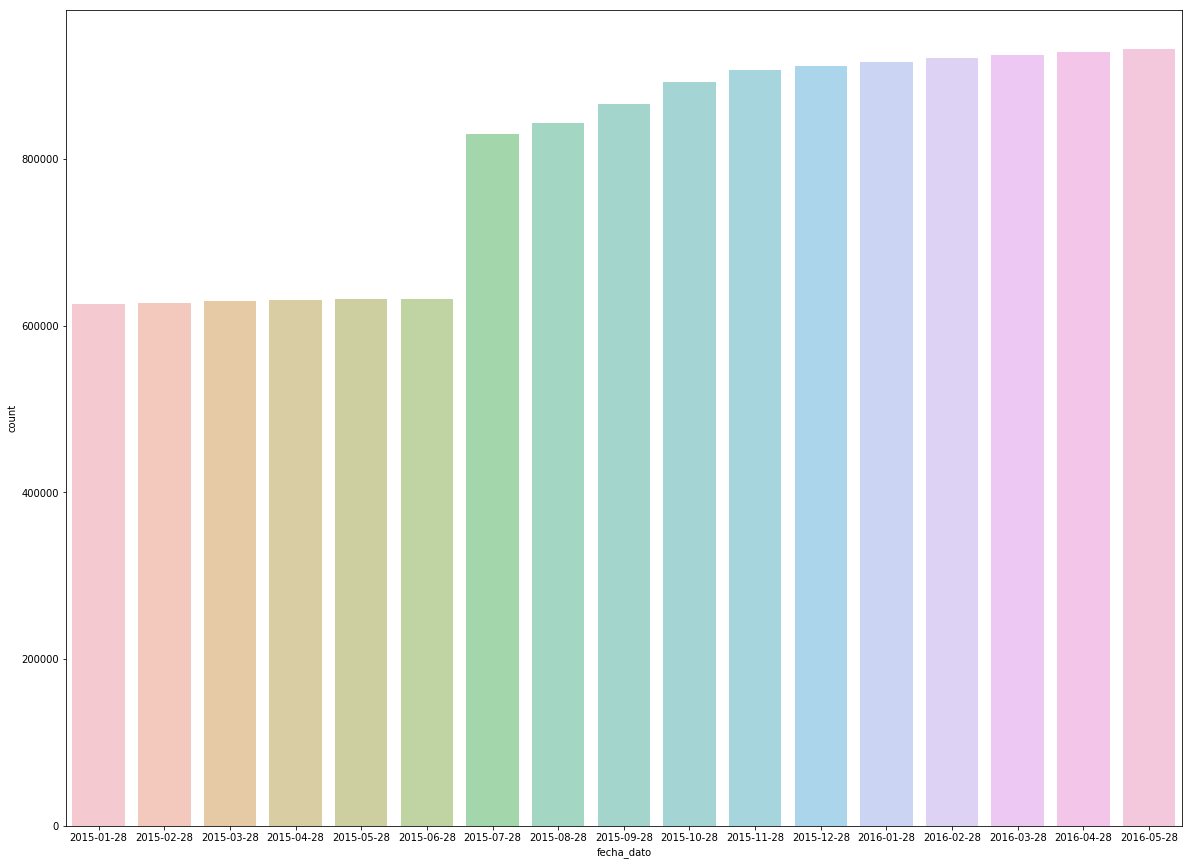

--------------------------------------------------
col :  age


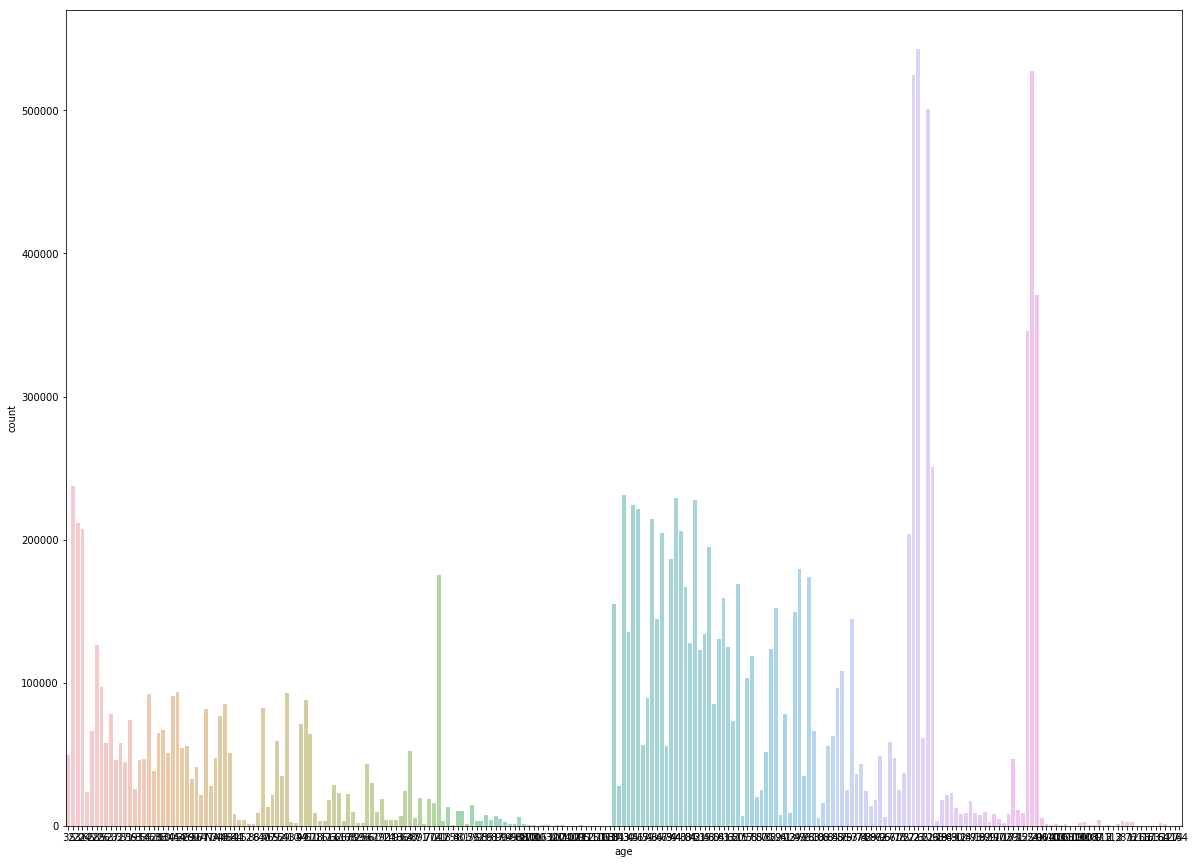

--------------------------------------------------
col :  fecha_alta


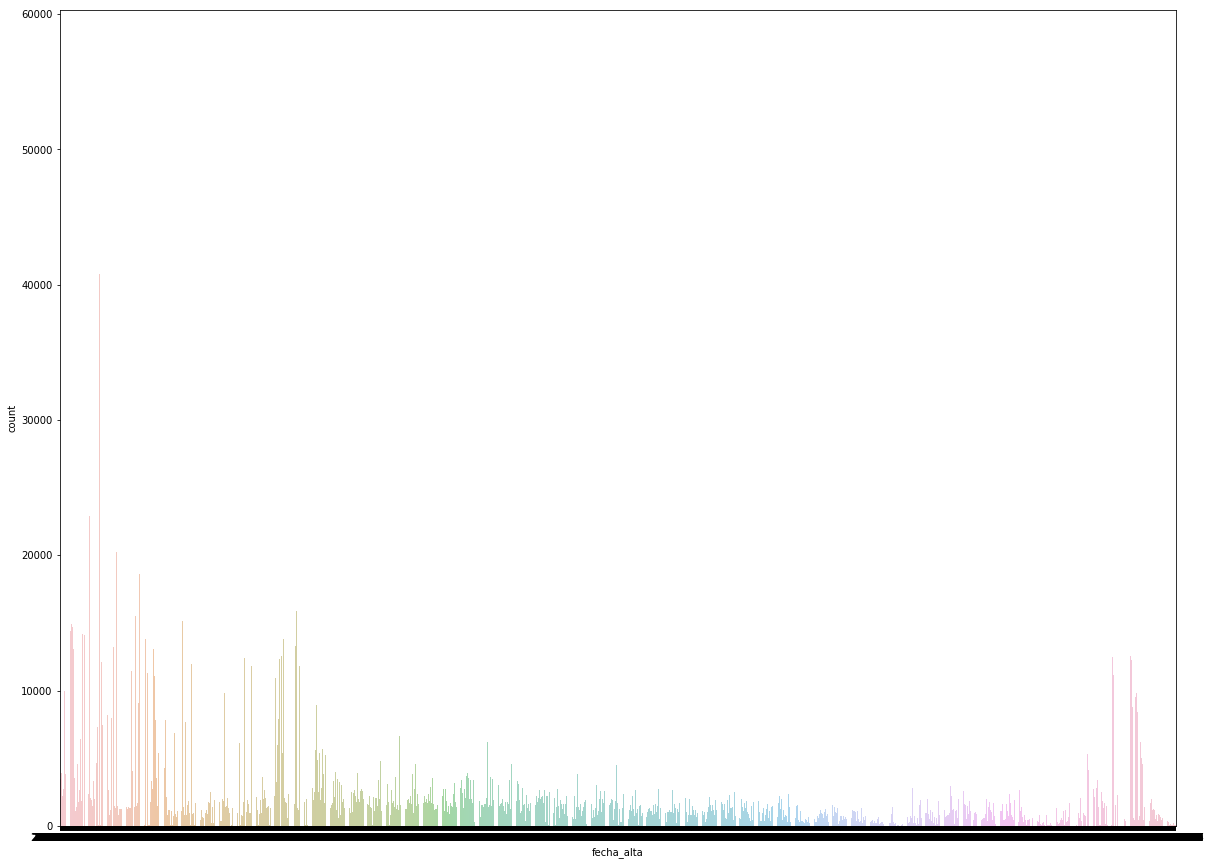

--------------------------------------------------
col :  antiguedad


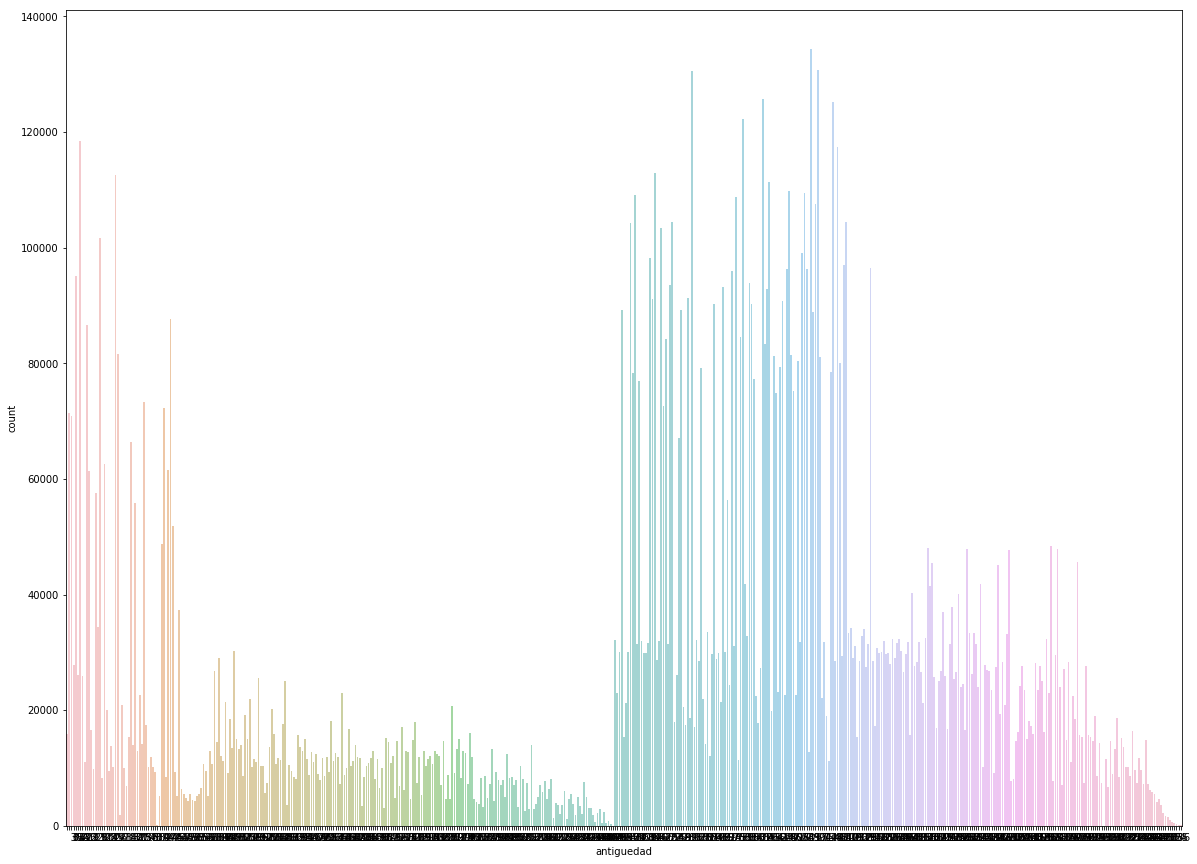

--------------------------------------------------
col :  indrel_1mes


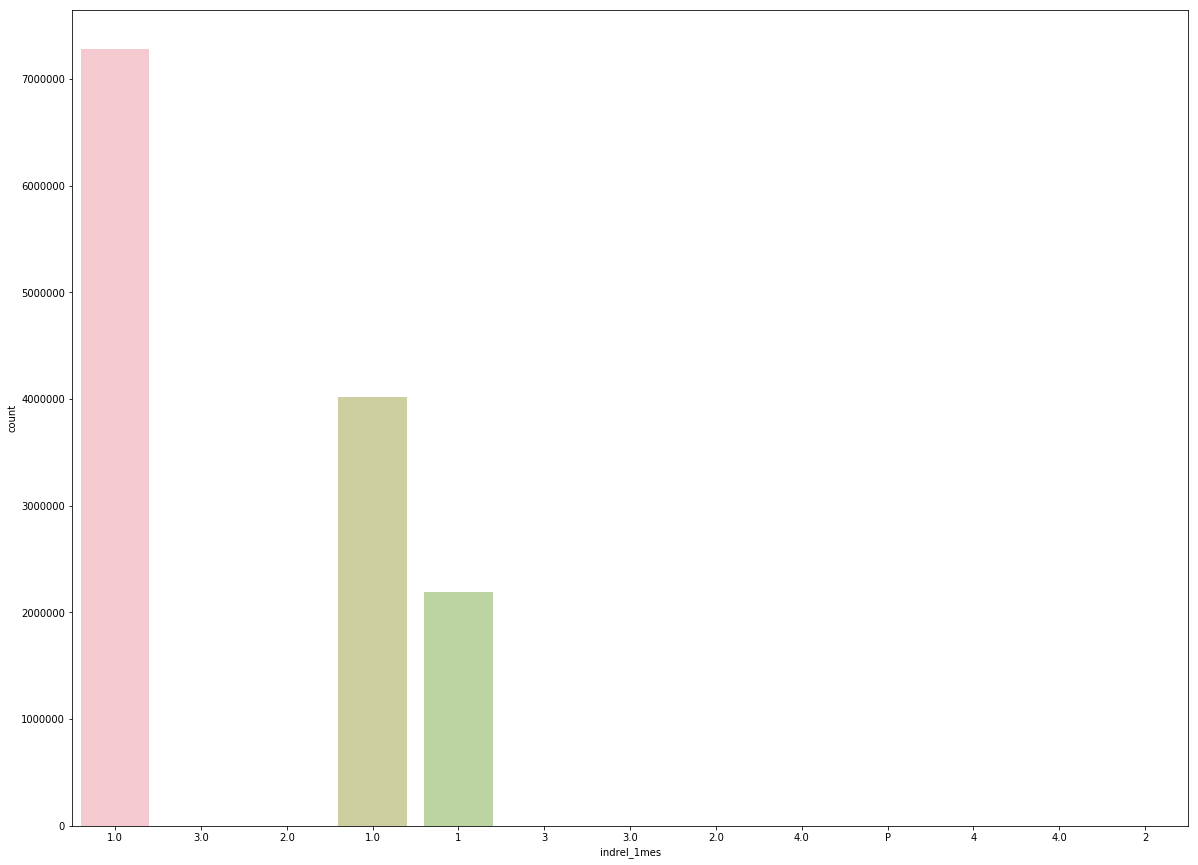

--------------------------------------------------
col :  conyuemp


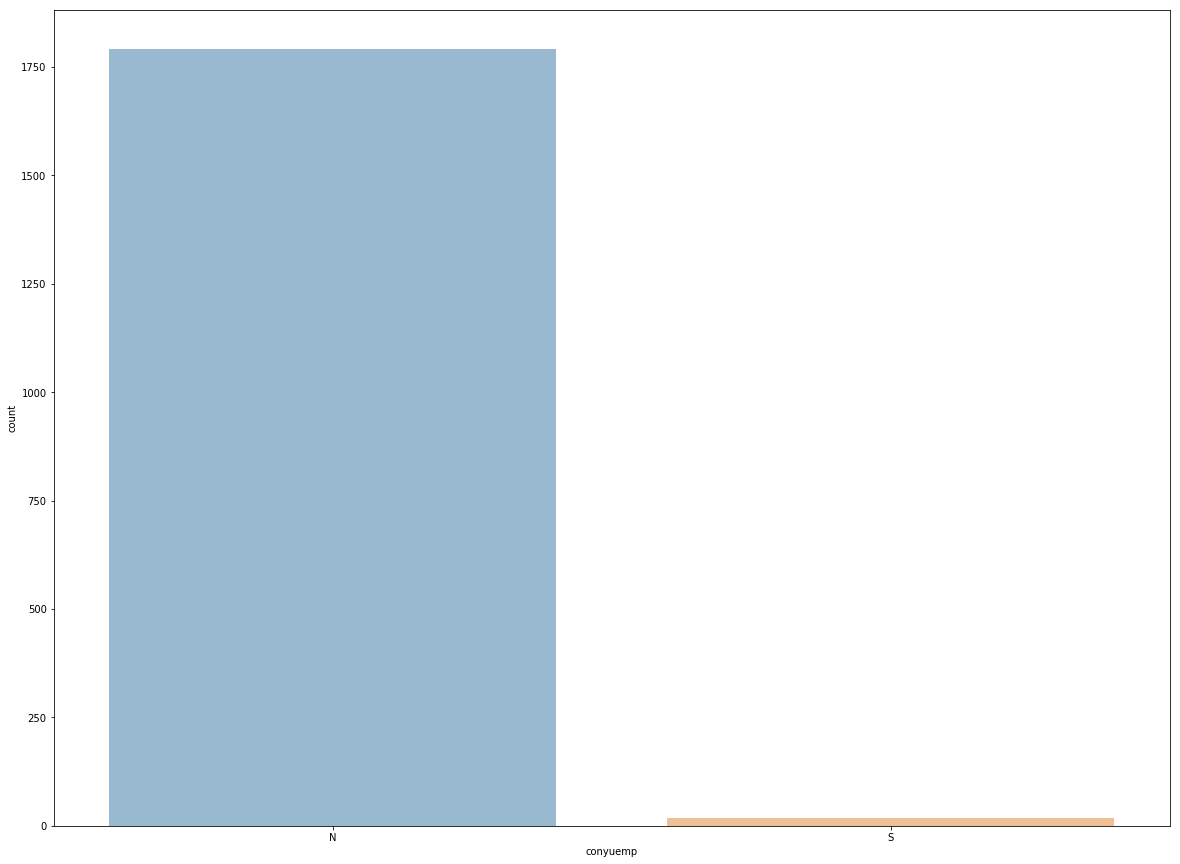

In [7]:
wanted_cols = ['fecha_dato', 'indrel_1mes', 'age', 'antiguedad', 'fecha_alta', 'conyuemp']

for col in trn.columns:
    if col in wanted_cols:
        # 보기 편하게 영역 구분과 변수명을 출력한다.
        print('-' * 50)
        print('col : ', col)

        # 그래프 크기를(figsize) 설정한다.
        f, ax = plt.subplots(figsize=(20, 15))
        # seaborn을 사용한 막대 그래프 생성
        sns.countplot(x=col, data=trn, alpha=0.5)
        plt.show()

제품 변수 24개와 고객변수 24개, 총 48개의 변수 중에서 대표적으로 6개를 살펴본다.

- fecha_dato : 
> 15년 1월 ~ 6월 즉, 첫 6개월은 고객 데이터 개수가 같다.
> 15년 7월부터 매달 고객 데이터가 증가한다

- age, antiguedad :
> 수치형 변수인 나이(age), 거래 누적 기간(antiguedad) 분포가 중간에 뚝 끊겨있다.
>
> object 형태로 저장되어 있어 데이터 정제가 필요하다.
> age의 경우 아래 숫자가 0~100 크기로 정렬되어 있지 않다.

- fecha_alta :
> 고객이 은행과 첫 계약을 체결한 날짜 데이터이다.
> 1995 ~ 2016년 까지 폭 넓은 값을 가진다.
>
> 1995년 부근과 2016년 부근이 높은 빈도를 보이는 것으로 보아 장기 고객과 신규 고객의 비율이 높아 보인다.

- indrel_1mes :
> 월초 기준 고객 등급을 의미하는 변수
>
> 변수 설명서에 따르면 수치형 (1, 2, 3, 4)와 범주형 (P) 값이 섞여 있다.
> 하지만 그래프에는 (1.0, 1.0, 1) 세 개의 동일한 값이 별로도 표시되어 있다. (데이터 정제 필요)

- conyuemp:
> 배우자 지표
> 
> 이번 경진대회 데이터에는 conyuemp와 같은 이진 변수가 많이 존재한다.

### 시계열 데이터 시각화

앞선 막대 그래프 시각화는 시계열성을 고려하지 않고, 1년 6개월치 데이터를 하나로 뭉쳐 시각화를 시도한 것이다.

그러나, 시계열 데이터를 올바르게 분석하려면 시간에 따른 변화 척도를 눈에 볼 수 있도록 분석해야 한다.

특히, 이전 변수인 24개의 제품 변수에 대해서는 앞선 막대 그래프 시각화로는 큰 의미를 도출해 내기가 어려운 것이 사실이다.

이번 경진대회의 목표는 **금융 제품 추천** 이다.

예측 해야하는 정답값, 즉 24개의 제품 변수에 대한 이해를 높이는 것은 매우 중요하다.


#### 누적 막대 그래프

가장 쉽게 접근할 수 있는 방법으로, 월별 제품 변수의 합을 누적 막대 그래프 형태로 시각화해보는 것이다.

제품을 보유하고 있을 때는 값이 1이고, 보유하고 있지 않을 때에는 값이 0이다.

이는 서로 다른 제품 간의 차이를 함께 시각화하기 위함이다.

..

**월별 금융 제품 보유 데이터(절대값)**

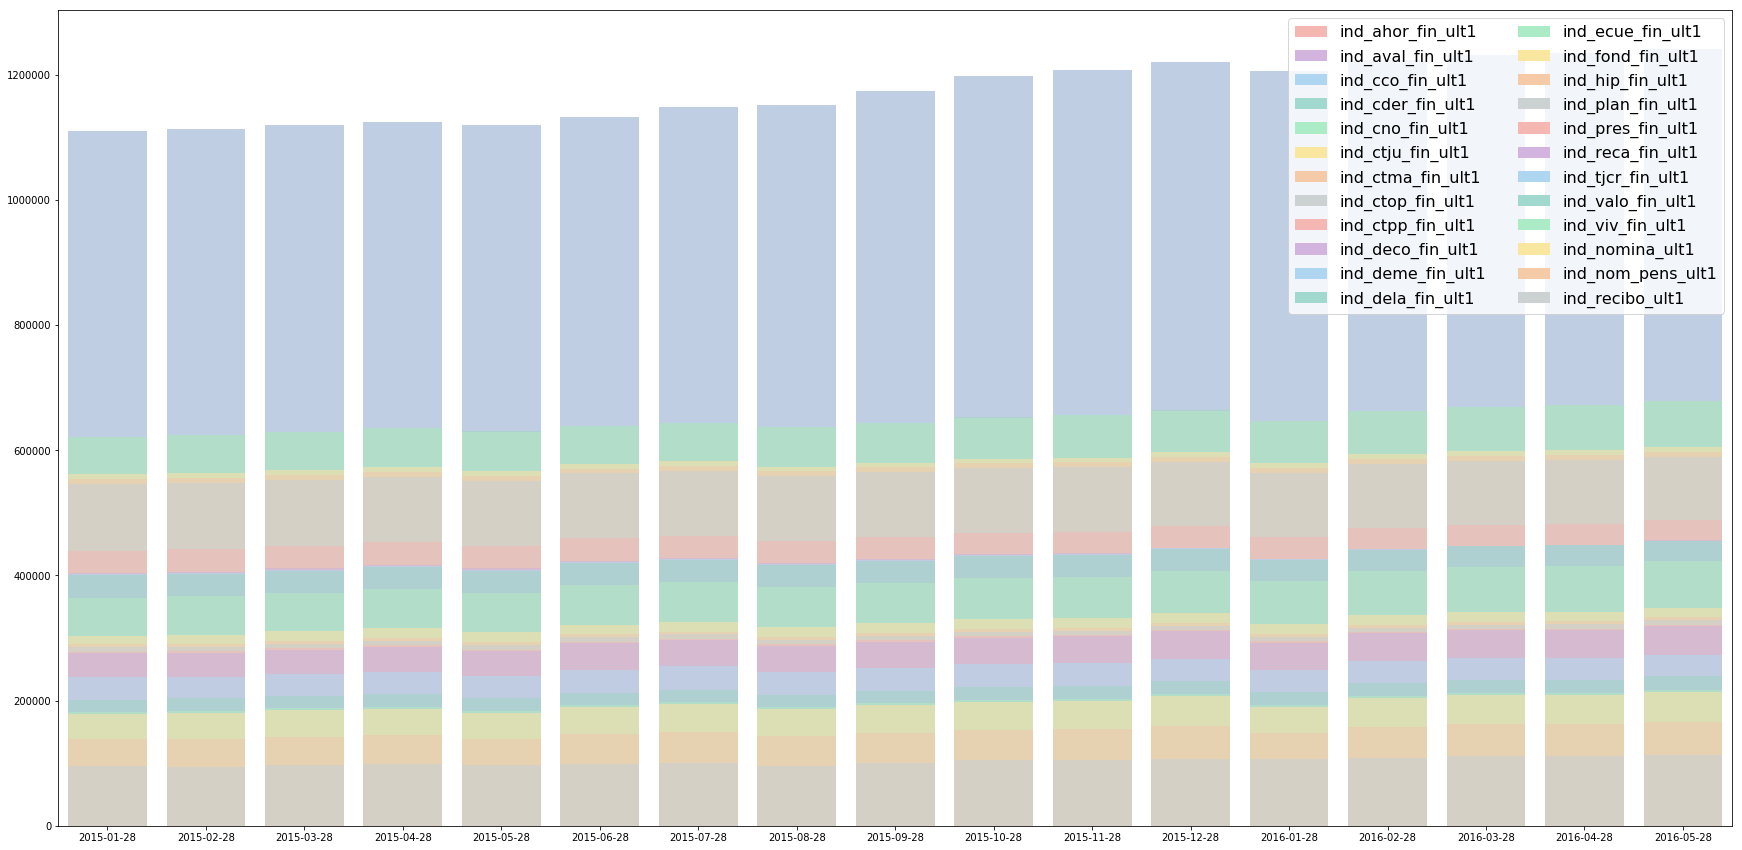

In [9]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터 별도로 추출한다.
months = trn['fecha_dato'].unique().tolist()
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
# 시각화를 위한 색깔 지정
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    # x축 : 월 데이터
    # y축 : 누적 총합
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
# 우측 상단에 legend 추가
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

총 제품 보유 수량이 매달마다 조금씩 상승하고 있는 것을 확인할 수 있다. 고객의 숫자가 꾸준히 늘어나고 있기 때문으로 보인다.

제품 간 비율을 확인하기 위해 절댓값이 아닌 상대값으로 시각화를 시도해보자.

..

**월별 금융 제품 보유 데이터(상대값)**

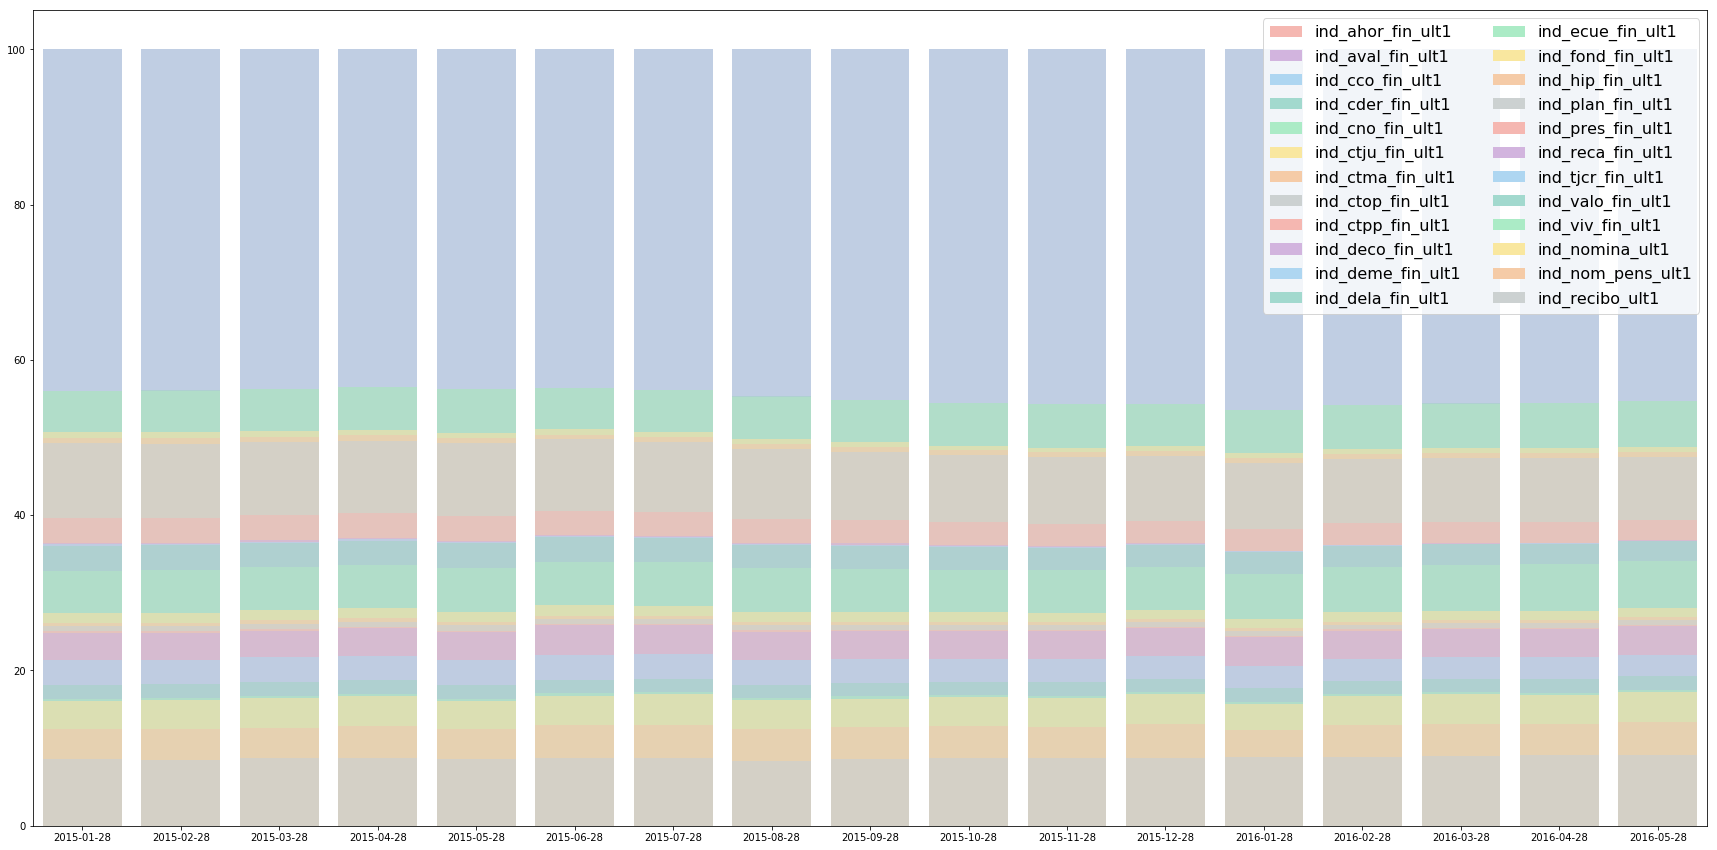

In [14]:
# 월마다 최대값으로 나누고 100을 곱해준다
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

'ind_cco_fin_ult1' 제품의 보유량이 계절에 상관없이 꾸준히 높은 것을 확인할 수 있고, 다른 제품의 비율도 1년 6개월 간 큰 변화 없이 꾸준해 보인다.

아쉽게도 눈에 띄는 변화 혹은 패턴을 찾기가 어렵다.

#### '신규 구매' 여부

훈련 데이터와 같은 row 크기를 가지며, 24개의 column은 각 24개의 금융 제품의 신규 구매 여부를 의미하는 **'labels.csv'** 파일을 생성한다.

In [4]:
# 제품 변수를 prods에 list형태로 저장한다
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려있기 때문에, 저번달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del trn, trn_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)

# 원본 데이터에서의 제품 보유 여부 – lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('input/labels.csv', index=False)

생성된 'labels.csv' 파일을 기반으로 시계열성 시각화를 다시 시도해보자.

앞선 코드와 비슷하지만 이번에는 합을 계산하는 기준이 '신규 구매 데이터' 이다.

C:\Users\User\anaconda3\envs\kaggle_venv\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


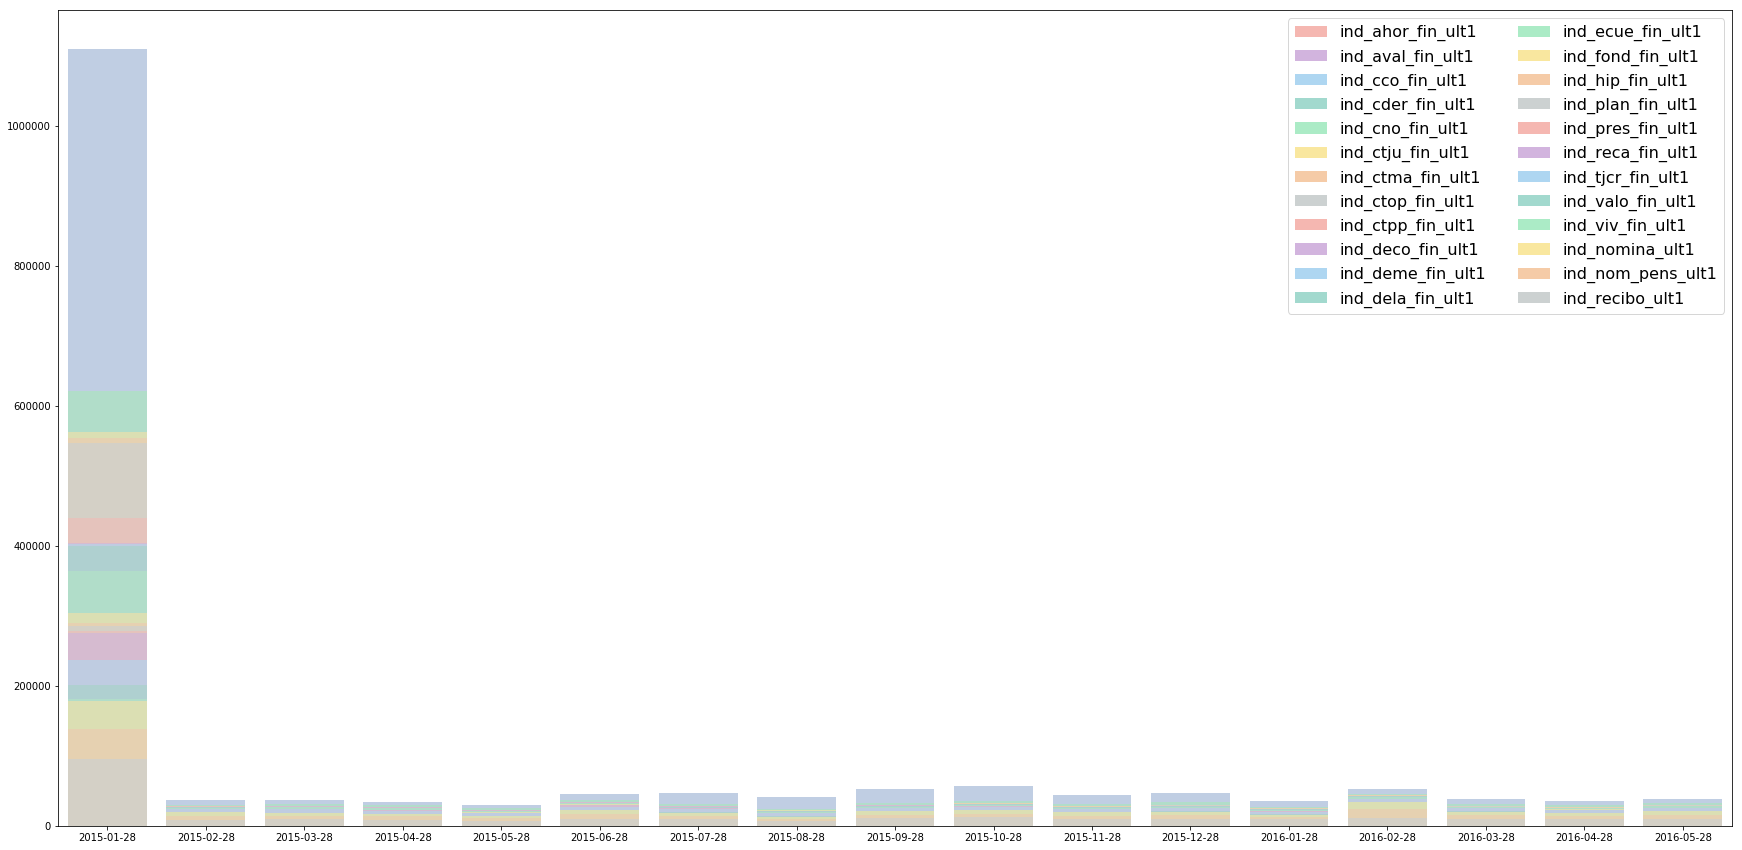

In [11]:
# labels = pd.read_csv('input/labels.csv').astype(int)
fecha_dato = pd.read_csv('input/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

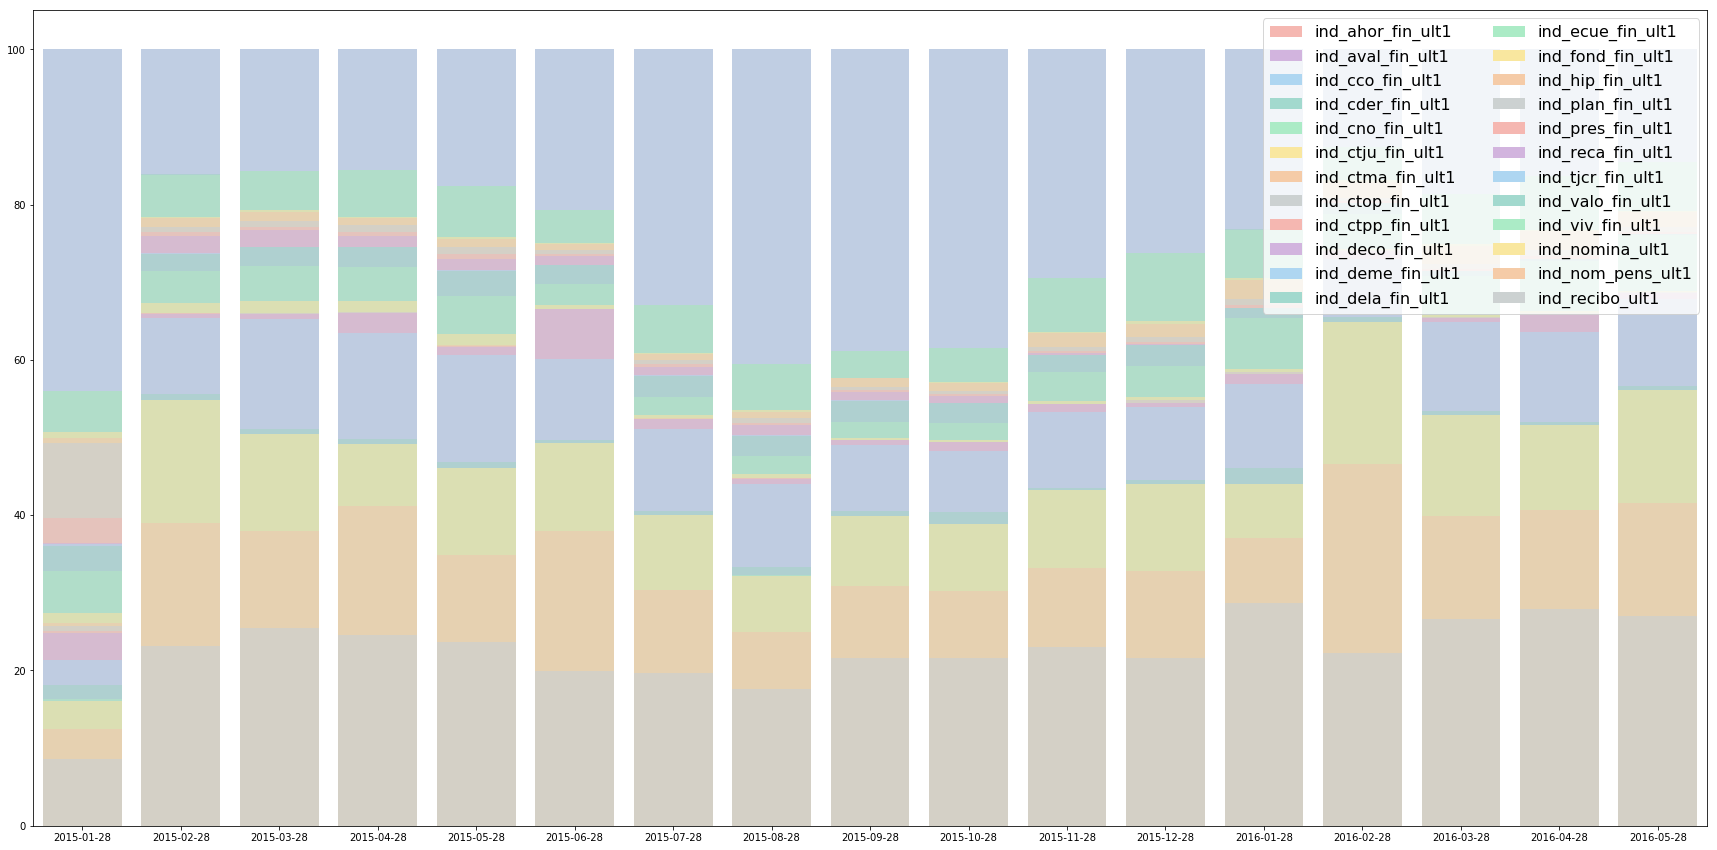

In [12]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})